In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Images/captcha0.png',0)

In [3]:
cv2.imshow('Gray Image',img)
cv2.waitKey()
cv2.destroyAllWindows()

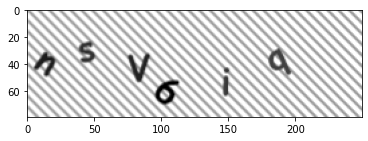

In [4]:
plt.imshow(img,cmap='gray')

In [5]:
#Binary Inv gives best results for contour detection
ret, thresh = cv2.threshold(img, 100, 255,cv2.THRESH_BINARY_INV)

In [6]:
cv2.imshow('Gray Image',thresh)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
img_b = cv2.GaussianBlur(thresh,(5,5),0)

In [8]:
cv2.imshow('Blurred Image',img_b)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
#In our case canny edge detection wasn't very helpful in contour detection.
edged = cv2.Canny(img_b,100,255)

In [10]:
cv2.imshow('Canny Edged Image',edged)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
img1 = img_b.copy()
img2 = edged.copy()

In [12]:
contours1,hierarchy1 = cv2.findContours(img1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.imshow('Contoured Blurred Image',img1)
cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
print(len(contours1))

6


In [14]:
contours2,hierarchy2 = cv2.findContours(img2,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.imshow('Contoured Edged Image',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
print(len(contours2))

7


In [16]:
cv2.drawContours(img2,contours2,-1,(255,255,255),3)
cv2.imshow('Contoured Blurred Image',img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
cv2.drawContours(img1,contours1,-1,(255,255,255),3)
cv2.imshow('Contoured Blurred Image',img1)
cv2.waitKey()
cv2.destroyAllWindows()

In [18]:
for i,cnt in enumerate(contours1):
    #Get coordinates of bounding rectangle
    (x, y, w, h) = cv2.boundingRect(cnt)
    
    #Crop the image on the coordinates
    cropped_contour = img1[y:y+h,x:x+w]
    
    #Give image a name
    img_name = "{}.jpg".format(i)
    
    #Save the cropped file to disk
    cv2.imwrite(img_name, cropped_contour)